In [1]:
import pickle

In [2]:
all_documents = pickle.load( open( "../week_03_getting_data/all_documents.pkl", "rb" ) )

Rather than consider the words per document, lets look at all of them

In [3]:
all_the_words=""
for file_path,content in all_documents.items():
    all_the_words+=content
    all_the_words+=" "

In [4]:
all_the_words[0:40]

'Summary of A Very Short History Of Data '

In [5]:
all_the_words=all_the_words.lower()

In [6]:
all_the_words[0:40]

'summary of a very short history of data '

In [7]:
list_of_words=all_the_words.split(" ")

In [8]:
len(list_of_words)

7137

In [9]:
len(set(list_of_words))

1857

https://stackoverflow.com/questions/4371231/removing-punctuation-from-python-list-items

In [10]:
import string
list_of_words = [''.join(ch for ch in st if ch in string.ascii_lowercase) for st in list_of_words]

an expanded version 

In [11]:
list_of_words_without_punctuation=[]
for this_string in list_of_words:
    new_list_of_char=[]
    for this_char in this_string:
        if (this_char in string.ascii_lowercase):
            new_list_of_char.append(this_char)
    new_string=''.join(new_list_of_char)
    list_of_words_without_punctuation.append(new_string)

In [12]:
len(set(list_of_words))

1432

https://stackoverflow.com/questions/3845423/remove-empty-strings-from-a-list-of-strings

In [13]:
list_of_words = list(filter(None, list_of_words))

In [14]:
len(list_of_words)

6831

In [15]:
len(set(list_of_words))

1431

In [16]:
max(set(list_of_words), key=list_of_words.count)

'the'

https://stackoverflow.com/questions/10099602/how-to-get-the-10-most-frequent-strings-in-a-list-in-python

In [17]:
from collections import Counter

In [18]:
Counter(list_of_words).most_common(10)

[('the', 379),
 ('data', 296),
 ('of', 243),
 ('and', 237),
 ('to', 188),
 ('a', 166),
 ('science', 146),
 ('in', 139),
 ('are', 94),
 ('is', 91)]

https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

In [19]:
dict_of_count=Counter(list_of_words)
import operator
sorted_tuples = sorted(dict_of_count.items(), key=operator.itemgetter(1),reverse=True)

https://stackoverflow.com/questions/646644/how-to-get-last-items-of-a-list-in-python

Alternatively, we could have told sort to reverse the list

In [20]:
sorted_tuples[-10:]

[('come', 1),
 ('pull', 1),
 ('options', 1),
 ('wish', 1),
 ('earlier', 1),
 ('journey', 1),
 ('save', 1),
 ('spent', 1),
 ('going', 1),
 ('forward', 1)]

Need to remove the stop words

In [21]:
!pip install nltk

    100% |████████████████████████████████| 1.4MB 819kB/s 
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk


In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

In [24]:
filtered_word_list = [] 
for w in list_of_words: 
    if w not in en_stops: 
        filtered_word_list.append(w) 

In [25]:
len(filtered_word_list)

3907

In [26]:
len(set(filtered_word_list))

1326

In [27]:
Counter(filtered_word_list).most_common(10)

[('data', 296),
 ('science', 146),
 ('python', 60),
 ('statistics', 49),
 ('lists', 41),
 ('methods', 32),
 ('chapter', 31),
 ('dictionaries', 31),
 ('also', 27),
 ('field', 26)]

When I see a list of numbers, I seek a visualization of the data.

First we need to convert the dictionary to a list of values.

In [28]:
list_of_counts=[]
for word,count in dict(Counter(filtered_word_list)).items():
    list_of_counts.append(count)

In [29]:
import matplotlib.pylab as plt

Let's see what a histogram looks like

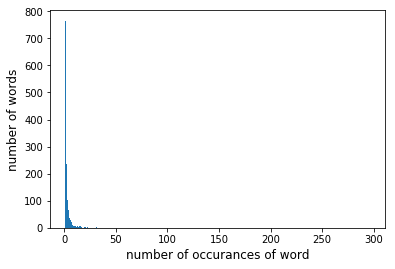

In [30]:
plt.hist(list_of_counts,bins=300)
plt.xlabel('number of occurances of word',fontsize=12)
plt.ylabel('number of words',fontsize=12)
plt.show()

There's a lot of rare words and a small number of words which appear often.

To get a better view, use the log of the y-axis.

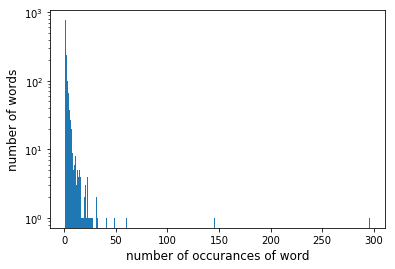

In [31]:
plt.hist(list_of_counts,bins=300)
plt.yscale('log', nonposy='clip')
plt.xlabel('number of occurances of word',fontsize=12)
plt.ylabel('number of words',fontsize=12)
plt.show()

The semilogy histogram shows slightly more, but the few words that are frequent still skew the view.

Log for both y-axis and x-axis:

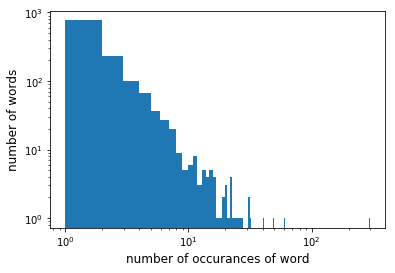

In [32]:
plt.hist(list_of_counts,bins=300)
plt.yscale('log', nonposy='clip')
plt.xscale('log', nonposx='clip')
plt.xlabel('number of occurances of word',fontsize=12)
plt.ylabel('number of words',fontsize=12)
plt.show()

A straight line on a [log-log](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) axis is $$y=ax^k$$

https://en.wikipedia.org/wiki/Power_law

Well known feature of https://en.wikipedia.org/wiki/Zipf%27s_law

"Zipfian nature of word frequency distributions causes data sparseness problems." [source](http://sslmit.unibo.it/~baroni/publications/hsk_39_dist_rev2.pdf)

## So what?

The relevance is that we've stumbled into a verification that the text data really is text. If there were 10,000 documents, we wouldn't be able to inspect each document. Verifying that Zipf's law is applicable builds evidence that the documents are what we assume them to be.